In [ ]:
import json

# Load the JSONL file
data = []
# with open('/mnt/petrelfs/hujucheng/train/data/index/aya_muri_openhms_sft1v2_xinv3_filtered2_id_label_score.jsonl', 'r') as f:
with open('/mnt/petrelfs/hujucheng/train/data/index/filtered_B.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [14]:
scores = [item['score'] for item in data]
task_labels = [item['task_label'] for item in data]

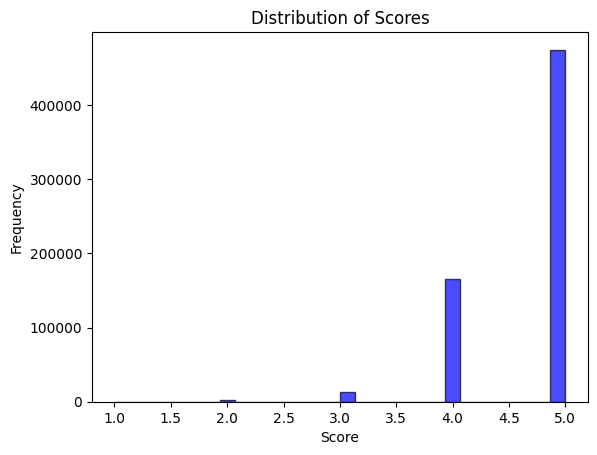

In [15]:
import matplotlib.pyplot as plt

plt.hist(scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
scores.count(5)

474373

In [17]:
scores.count(4)

165297

In [18]:
scores.count(3)

12543

In [ ]:
import json
import jsonlines

def read_jsonl(file_path):
    data = []
    with jsonlines.open(file_path) as reader:
        for obj in reader:
            data.append(obj)
    return data


def write_jsonl(file_path, data):
    with jsonlines.open(file_path, mode='w') as writer:
        for item in data:
            writer.write(item)

def main():
    # Read JSONL files A and B
    A = read_jsonl('/mnt/petrelfs/hujucheng/train/data/index/data_70M.jsonl')
    B = read_jsonl('/mnt/petrelfs/hujucheng/train/data/index/aya_muri_openhms_sft1v2_xinv3_filtered2_id_label_score.jsonl')

    # Print the lengths of A and B
    print(f"Length of A: {len(A)}")
    print(f"Length of B: {len(B)}")

    # Extract _id values from A
    ids_in_A = set(item['_id'] for item in A)

    # Filter dictionaries in B where _id is in A
    filtered_B = [item for item in B if item['_id'] in ids_in_A]

    # Save the filtered dictionaries from B to a new JSONL file
    output_file = '65wBasewithScore.jsonl'
    write_jsonl(output_file, filtered_B)

    # Print the length of the filtered data
    print(f"Length of filtered B: {len(filtered_B)}")

if __name__ == "__main__":
    main()

Length of A: 704346
Length of B: 1965844
Length of filtered B: 654125
